<a href="https://colab.research.google.com/github/geraldalivia/Air-Index-Quality/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analysis Project: Air Quality
- **Nama:** Geralda Livia Nugraha
- **Email:** mc299d5x1168@student.devacademy.id
- **ID Dicoding:** [MC299D5X1168](https://www.dicoding.com/users/alddar/)

## Define Business Question
1. What is the daily pattern of PM10 concentrations at Dongsi and Wanliu stations for the period 2013-2017?
2. What are the specific effects of temperature (TEMP), dew point(DEWP), and air pressure (PRES) on PM10 at Dongsi and Wanliu stations over the past 12 months?

## Library

In [3]:
!pip install session_info

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 3.4 MB/s eta 0:00:00
  Created wheel for session_info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=e7ba4dca2735f27638dacda939604ab6bda0ca3616436ffad2478b4acfe09377
  Stored in directory: /root/.cache/pip/wheels/4e/56/35/a748fc57279a4b84d0b332879445fed1ad8478e7257986b015
Successfully built session_info


In [4]:
# Importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import session_info

from scipy import stats
from google.colab import drive

In [8]:
session_info.show()

## Data Wrangling

### Gathering Data

In [9]:
# To access data in gdrive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [10]:
# Load data Dongsi Station
dongsiDf = pd.read_csv("/content/drive/MyDrive/Submission/Analisis Data/Data/Air-Quality-Dataset/PRSA_Data_Dongsi_20130301-20170228.csv")
dongsiDf.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


In [11]:
# Load Data Wanliu Station
wanliuDf = pd.read_csv("/content/drive/MyDrive/Submission/Analisis Data/Data/Air-Quality-Dataset/PRSA_Data_Wanliu_20130301-20170228.csv")
wanliuDf.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7,Wanliu
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Wanliu
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1,Wanliu
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0,Wanliu


In [12]:
# Combined Data Dongsi and Wanliu
df = pd.concat([dongsiDf, wanliuDf], ignore_index=True)
print(df.head())

   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
1   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
2   3  2013      3    1     2    7.0   7.0  NaN  17.0  300.0  60.0  -1.2   
3   4  2013      3    1     3    3.0   3.0  5.0  18.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0   3.0  7.0   NaN  200.0  84.0  -1.9   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
1  1025.1 -22.1   0.0   NW   3.9  Dongsi  
2  1025.3 -24.6   0.0  NNW   5.3  Dongsi  
3  1026.2 -25.5   0.0    N   4.9  Dongsi  
4  1027.1 -24.5   0.0  NNW   3.2  Dongsi  


In [ ]:
# Save the combine data
df.to_csv("/content/drive/MyDrive/Submission/Analisis Data/Data/Data_Dongsi_Wanliu.csv", index=False)

**Insight:**

Here is an explanation of each column in the Air-Quality Dataset:
- No: Sequence number of rows in the dataset
- Year: Year of data collection
- month: Month of data collection
- day: Date of data collection
- hour: Hour of data collection
- PM2.5: Concentration of particles with a diameter of 2.5 micrometers or less
- PM10: Concentration of particles with a diameter of 10 micrometers or less
- SO2: Concentration of sulfur dioxide
- NO2: Nitrogen dioxide concentration
- CO: Carbon monoxide concentration
- O3: Ozone concentration
- TEMP: Air temperature
- PRESS: Air pressure
- DEWP: Dew point
- RAIN: Rainfall
- wd: Wind direction (NNW = North-Northwest, NW = Northwest, N = North)
- WSPM: Wind speed
- Station: Data collection station location


### Assessing Data

In [13]:
# Get to know the detail of data
check = df.head()
columns = df.columns
datatypes = df.dtypes

check, columns, datatypes

(   No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
 0   1  2013      3    1     0    9.0   9.0  3.0  17.0  300.0  89.0  -0.5   
 1   2  2013      3    1     1    4.0   4.0  3.0  16.0  300.0  88.0  -0.7   
 2   3  2013      3    1     2    7.0   7.0  NaN  17.0  300.0  60.0  -1.2   
 3   4  2013      3    1     3    3.0   3.0  5.0  18.0    NaN   NaN  -1.4   
 4   5  2013      3    1     4    3.0   3.0  7.0   NaN  200.0  84.0  -1.9   
 
      PRES  DEWP  RAIN   wd  WSPM station  
 0  1024.5 -21.4   0.0  NNW   5.7  Dongsi  
 1  1025.1 -22.1   0.0   NW   3.9  Dongsi  
 2  1025.3 -24.6   0.0  NNW   5.3  Dongsi  
 3  1026.2 -25.5   0.0    N   4.9  Dongsi  
 4  1027.1 -24.5   0.0  NNW   3.2  Dongsi  ,
 Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
        'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
       dtype='object'),
 No           int64
 year         int64
 month        int64
 day          int64
 hour       

In [14]:
# To Know Missing Values
missing_values = df.isnull().sum()
print("\nTotal missing values:")
print(missing_values)


Total missing values:
No            0
year          0
month         0
day           0
hour          0
PM2.5      1132
PM10        837
SO2        1238
NO2        2671
CO         5009
O3         2771
TEMP         40
PRES         40
DEWP         40
RAIN         40
wd          201
WSPM         28
station       0
dtype: int64


In [15]:
# To know Missing Precentage
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("\nPrecentage of missing values:")
print(missing_percentage)


Precentage of missing values:
No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      1.614191
PM10       1.193532
SO2        1.765343
NO2        3.808750
CO         7.142653
O3         3.951346
TEMP       0.057039
PRES       0.057039
DEWP       0.057039
RAIN       0.057039
wd         0.286619
WSPM       0.039927
station    0.000000
dtype: float64


In [16]:
# To Check Duplicate Data
duplicate = df.duplicated().sum()
print(f"Total duplicate: {duplicate}")

Total duplicate: 0


**Insight:**
- There is a considerable amount of missing values for some pollutants. In terms of percentage, this number is still relatively small for PM10 (around 1.19%), indicating that most of the data is still available for analysis
- In terms of percentage of missing values, similar to pollutants, some meteorological factors are also relatively small for both TEMP, DEWP, and PRES (arround 0.057%), indicating that most of the data is still available for analysis
- Zero duplicate data found in the dataset

### Cleaning Data

In [17]:
# Imputation Missing Values with Median Value
data_numeric = df.select_dtypes(include=['float64', 'int64']).columns
for coloumn in data_numeric:
    df[coloumn].fillna(df[coloumn].median(), inplace=True)

<ipython-input-17-f47058e8ec07>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[coloumn].fillna(df[coloumn].median(), inplace=True)


In [18]:
# Check again the data after did imputation for missing value
print(df)

          No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
0          1  2013      3    1     0    9.0   9.0   3.0  17.0  300.0  89.0   
1          2  2013      3    1     1    4.0   4.0   3.0  16.0  300.0  88.0   
2          3  2013      3    1     2    7.0   7.0  10.0  17.0  300.0  60.0   
3          4  2013      3    1     3    3.0   3.0   5.0  18.0  900.0  39.0   
4          5  2013      3    1     4    3.0   3.0   7.0  53.0  200.0  84.0   
...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
70123  35060  2017      2   28    19   11.0  27.0   4.0  20.0  300.0  81.0   
70124  35061  2017      2   28    20   15.0  43.0   6.0  55.0  500.0  45.0   
70125  35062  2017      2   28    21   13.0  35.0   7.0  48.0  500.0  48.0   
70126  35063  2017      2   28    22   12.0  31.0   5.0  47.0  500.0  50.0   
70127  35064  2017      2   28    23    7.0  25.0   6.0  86.0  700.0  11.0   

       TEMP    PRES  DEWP  RAIN   wd  WSPM station  
0      -0.

**Insight:**
- Fill imputation with median value for missing values. The changes comparison between the data in Table detail of data (before the imputation, there are some missing values) and the table check data again (after the imputation, the missing values were fill)

## Exploratory Data Analysis (EDA)

### Explore the combine DataFrame

In [19]:
def prepare_data(df):
  df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

  print(f"Number of rows: {df.shape[0]}")
  print(f"Number of columns: {df.shape[1]}")
  print(f"Period of time {df['datetime'].min()} until {df['datetime'].max()}")
  print(f"Available of station: {df['station'].unique()}")

  return df

prepare_data(df)

Number of rows: 70128
Number of columns: 19
Period of time 2013-03-01 00:00:00 until 2017-02-28 23:00:00
Available of station: ['Dongsi' 'Wanliu']


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi,2013-03-01 00:00:00
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi,2013-03-01 01:00:00
2,3,2013,3,1,2,7.0,7.0,10.0,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi,2013-03-01 02:00:00
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,900.0,39.0,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,7.0,53.0,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70123,35060,2017,2,28,19,11.0,27.0,4.0,20.0,300.0,81.0,12.6,1011.9,-14.3,0.0,N,2.0,Wanliu,2017-02-28 19:00:00
70124,35061,2017,2,28,20,15.0,43.0,6.0,55.0,500.0,45.0,9.4,1012.3,-11.9,0.0,WSW,1.0,Wanliu,2017-02-28 20:00:00
70125,35062,2017,2,28,21,13.0,35.0,7.0,48.0,500.0,48.0,8.7,1012.8,-13.7,0.0,N,1.1,Wanliu,2017-02-28 21:00:00
70126,35063,2017,2,28,22,12.0,31.0,5.0,47.0,500.0,50.0,7.8,1012.9,-12.6,0.0,NNE,1.0,Wanliu,2017-02-28 22:00:00


**Insight:**
- Total Data: 70,128 rows × 19 columns
- Time Period: 2013-03-01 to 2017-02-28 (approximately 4 years)
- Stations: There are two observation sites, Dongsi and Wanliu

### Explore the DataFrame by highest and lowest PM10 concentration, also daily, weekly, monthly, and annual/yearly pattern  

In [20]:
# For Daily Pattern
year_filter = df[(df['year'] >= 2013) & (df['year'] <= 2017)]
hourly_pattern = year_filter.groupby(['station', 'hour'])['PM10'].mean().unstack()

#For Weekly Pattern
year_filter['day_of_week'] = year_filter['datetime'].dt.dayofweek
weekly_pattern = year_filter.groupby(['station', 'day_of_week'])['PM10'].mean().unstack()

In [21]:
def daily_pattern(df):
    # Daily Pattern by Hour
    print(hourly_pattern)

    # Hours with highest & lowest PM10 concentration
    for station in year_filter['station'].unique():
        station_data = year_filter[year_filter['station'] == station]
        hourly_avg = station_data.groupby('hour')['PM10'].mean()
        max_hour = hourly_avg.idxmax()
        min_hour = hourly_avg.idxmin()
        print(f"{station}: Highest at {max_hour} ({hourly_avg[max_hour]:.2f}), Lowest at {min_hour} ({hourly_avg[min_hour]:.2f})")

    # Weekly Pattern by day
    print(weekly_pattern)

    # Monthly Pattern
    monthly_pattern = year_filter.groupby(['station', 'month'])['PM10'].mean().unstack()
    print(monthly_pattern)

    # Annual/Yearly Pattern
    yearly_pattern = year_filter.groupby(['station', 'year'])['PM10'].mean().unstack()
    print(yearly_pattern)

    return year_filter, hourly_pattern, weekly_pattern, monthly_pattern, yearly_pattern

daily_pattern(df)

hour             0           1           2           3           4   \
station                                                               
Dongsi   124.241615  121.373032  118.646749  113.859069  108.451745   
Wanliu   124.481177  120.421629  114.762491  110.397057  106.799452   

hour             5           6           7           8           9   ...  \
station                                                              ...   
Dongsi   103.459959  102.065024  101.273169  102.433881  102.184805  ...   
Wanliu   102.528405  101.745380  104.716701  111.485284  109.206708  ...   

hour            14         15          16          17         18          19  \
station                                                                        
Dongsi   96.564682  97.876112  100.380630  103.590691  111.87269  120.310541   
Wanliu   94.251198  96.617591  101.008487  104.906229  113.78371  119.982752   

hour             20          21          22          23  
station                        

(          No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  \
 0          1  2013      3    1     0    9.0   9.0   3.0  17.0  300.0  89.0   
 1          2  2013      3    1     1    4.0   4.0   3.0  16.0  300.0  88.0   
 2          3  2013      3    1     2    7.0   7.0  10.0  17.0  300.0  60.0   
 3          4  2013      3    1     3    3.0   3.0   5.0  18.0  900.0  39.0   
 4          5  2013      3    1     4    3.0   3.0   7.0  53.0  200.0  84.0   
 ...      ...   ...    ...  ...   ...    ...   ...   ...   ...    ...   ...   
 70123  35060  2017      2   28    19   11.0  27.0   4.0  20.0  300.0  81.0   
 70124  35061  2017      2   28    20   15.0  43.0   6.0  55.0  500.0  45.0   
 70125  35062  2017      2   28    21   13.0  35.0   7.0  48.0  500.0  48.0   
 70126  35063  2017      2   28    22   12.0  31.0   5.0  47.0  500.0  50.0   
 70127  35064  2017      2   28    23    7.0  25.0   6.0  86.0  700.0  11.0   
 
        TEMP    PRES  DEWP  RAIN   wd  WSPM statio

**Insight:**
- Diurnal Pattern: both stations showed the highest PM10 concentration at 21:00 (9pm) and the lowest at 13:00-14:00 (1-2pm). This shows a similar pattern that is consistent regardless of location.
- Weekly Pattern: both stations show the highest PM10 concentrations on Friday and Saturday and the lowest on Monday. This suggests a potential weekend effect on air quality.
- Monthly Pattern: both stations showed the highest PM10 concentrations in March (142.6 at Dongsi, 146.3 at Wanliu) and the lowest in August (73.8 at Dongsi, 78.3 at Wanliu). This indicates seasonal variations in air quality.
- Annual Pattern: There is variability from year to year, with the highest PM10 concentrations in Dongsi in 2017 (131.2) and in Wanliu in 2014 (129.9). While the lowest point occurred at both stations in 2016

### Explore the DataFrame by

In [22]:
# For get data for the last 12 months
max_date = df['datetime'].max()
twelve_month = max_date - pd.DateOffset(months=12)
df_12m = df[df['datetime'] >= twelve_month]

# Seperate data by Station
dongsi_12m = df_12m[df_12m['station'] == 'Dongsi']
wanliu_12m = df_12m[df_12m['station'] == 'Wanliu']

# KCorrelation by station
dongsi_corr = dongsi_12m[['PM10', 'TEMP', 'DEWP', 'PRES']].corr()
wanliu_corr = wanliu_12m[['PM10', 'TEMP', 'DEWP', 'PRES']].corr()

In [23]:
def weather_effects(df):
    # Determine the last 12 months
    print(f"\nPeriode of time: {twelve_month.date()} until {max_date.date()}")
    print(f"Total Data {df_12m.shape[0]}")

    # Correlation betwwen the weather parameter and PM10 Concentration for each station
    print(dongsi_corr)
    print(wanliu_corr)

    # Groupby TEMP based on category very cold, cold, mild, warm, and hot
    df_12m['temp'] = pd.cut(df_12m['TEMP'], bins=[-30, -15, 0, 15, 30, 45],
                                  labels=['Very Cold', 'Cold', 'Mild', 'Warm', 'Hot'])
    temp_group = df_12m.groupby(['station', 'temp'])['PM10'].agg(['mean', 'count']).reset_index()
    print(temp_group)

    # Groupby PRES based on category very low, low, high, and very high
    pres_quantile = df_12m['PRES'].quantile([0.25, 0.5, 0.75])
    df_12m['pres'] = pd.cut(df_12m['PRES'],
                                 bins=[df_12m['PRES'].min(),
                                       pres_quantile[0.25],
                                       pres_quantile[0.5],
                                       pres_quantile[0.75],
                                       df_12m['PRES'].max()],
                                 labels=['Very Low', 'Low', 'High', 'Very High'])
    pres_group = df_12m.groupby(['station', 'pres'])['PM10'].agg(['mean', 'count']).reset_index()
    print(pres_group)

    # Groupby Season based on category winter, spring, summer, and fall
    df_12m['season'] = pd.cut(df_12m['month'],
                             bins=[0, 3, 6, 9, 12],
                             labels=['Winter', 'Spring', 'Summer', 'Fall'],
                             include_lowest=True)
    season_group = df_12m.groupby(['station', 'season'])['PM10'].mean().reset_index()
    print(season_group)

    return df_12m, dongsi_corr, wanliu_corr, temp_group, pres_group, season_group

weather_effects(df)


Periode of time: 2016-02-28 until 2017-02-28
Total Data 17570
          PM10      TEMP      DEWP      PRES
PM10  1.000000 -0.273930 -0.055050  0.074426
TEMP -0.273930  1.000000  0.811072 -0.847333
DEWP -0.055050  0.811072  1.000000 -0.783536
PRES  0.074426 -0.847333 -0.783536  1.000000
          PM10      TEMP      DEWP      PRES
PM10  1.000000 -0.222996 -0.028481  0.029484
TEMP -0.222996  1.000000  0.809274 -0.838745
DEWP -0.028481  0.809274  1.000000 -0.790049
PRES  0.029484 -0.838745 -0.790049  1.000000
  station       temp        mean  count
0  Dongsi  Very Cold         NaN      0
1  Dongsi       Cold  157.126997   1252
2  Dongsi       Mild  127.100629   3180
3  Dongsi       Warm   90.131094   3692
4  Dongsi        Hot   68.671710    661
5  Wanliu  Very Cold         NaN      0
6  Wanliu       Cold  124.371326   1395
7  Wanliu       Mild  113.799680   3125
8  Wanliu       Warm   82.631134   3668
9  Wanliu        Hot   68.082077    597
  station       pres        mean  count
0  Dong

<ipython-input-23-ce9aabc80e10>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_12m['temp'] = pd.cut(df_12m['TEMP'], bins=[-30, -15, 0, 15, 30, 45],
<ipython-input-23-ce9aabc80e10>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_group = df_12m.groupby(['station', 'temp'])['PM10'].agg(['mean', 'count']).reset_index()
<ipython-input-23-ce9aabc80e10>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

(          No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO  ...  \
 26279  26280  2016      2   28    23    7.0  13.0  4.0  16.0  300.0  ...   
 26280  26281  2016      2   29     0    6.0  10.0  3.0  14.0  300.0  ...   
 26281  26282  2016      2   29     1    8.0  12.0  3.0  17.0  300.0  ...   
 26282  26283  2016      2   29     2    8.0   8.0  2.0  19.0  300.0  ...   
 26283  26284  2016      2   29     3   13.0  13.0  4.0  34.0  400.0  ...   
 ...      ...   ...    ...  ...   ...    ...   ...  ...   ...    ...  ...   
 70123  35060  2017      2   28    19   11.0  27.0  4.0  20.0  300.0  ...   
 70124  35061  2017      2   28    20   15.0  43.0  6.0  55.0  500.0  ...   
 70125  35062  2017      2   28    21   13.0  35.0  7.0  48.0  500.0  ...   
 70126  35063  2017      2   28    22   12.0  31.0  5.0  47.0  500.0  ...   
 70127  35064  2017      2   28    23    7.0  25.0  6.0  86.0  700.0  ...   
 
          PRES  DEWP  RAIN   wd  WSPM station            datetime  temp  \

**Insight:**
- Correlation analysis of weather parameters and PM10:
  1. Temperature (TEMP)  at both stations shows a negative correlation (-0.27 at Dongsi, -0.22 at wanliu) with PM10
  2. Air pressure (PRES) at both stations shows a weak positive correlation (0.07 at Dongsi, 0.02 at Wanliu) with PM10
  3. dew point (DEWP) at both stations shows a negative correlation (-0.05 at Dongsi, -0.02 at Wanliu) with PM10

- Temperature Effect: As temperature increases, PM10 concentration decreases. This is shown with the highest levels occurring during the Winter season (157.1 in Dongsi, 124.4 in Wanliu) and the lowest during the Summer season (68.7 in Dongsi, 68.1 in Wanliu).

- Pressure Effect: Both stations showed highs during High pressure conditions (143.9 at Dongsi, 127.8 at Wanliu). This indicates that there is a role for natural (atmospheric) gases in trapping pollutants.

- Seasonal Effects: Both stations show similar patterns of lows occurring during summer (70.6 at Dongsi, 68.2 at Wanliu). However, the highest point pattern is different, with Dongsi occurring during fall (148.9) and Wanliu during winter (118.9).

## Visualization & Explanatory Analysis

### Question 1: What is the daily pattern of PM10 concentrations at Dongsi and Wanliu stations for the period 2013-2017?

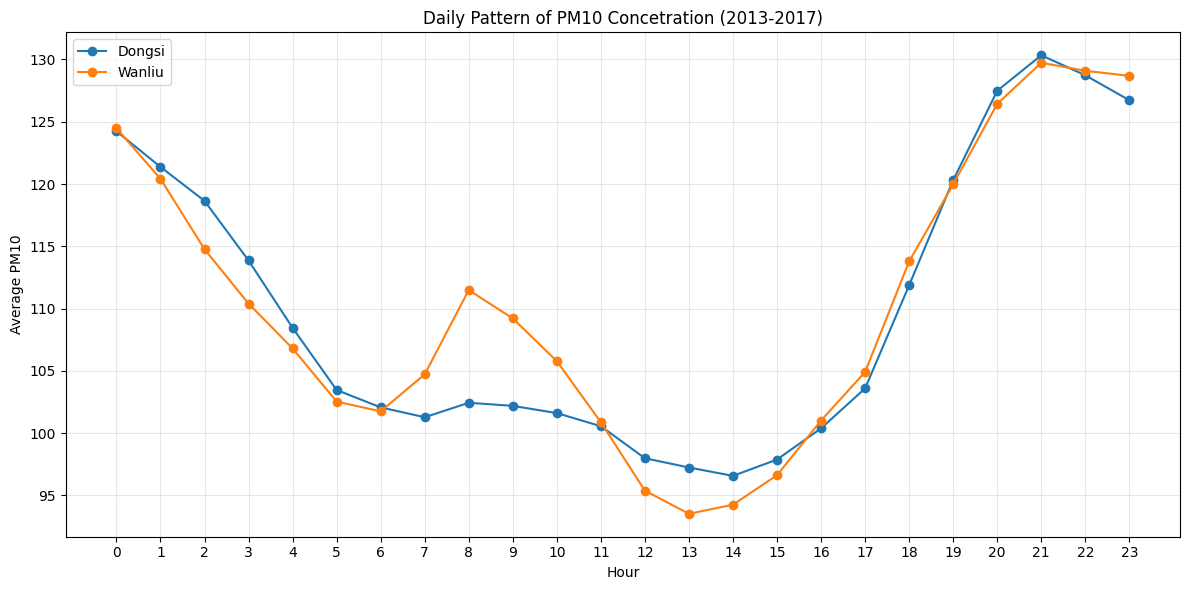

In [24]:
# Daily Pattern of PM10
plt.figure(figsize=(12, 6))
for station in hourly_pattern.index:
  plt.plot(hourly_pattern.loc[station], marker='o', label=station)

plt.title('Daily Pattern of PM10 Concetration (2013-2017)')
plt.xlabel('Hour')
plt.ylabel('Average PM10')
plt.xticks(range(24))
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

**Insight:**
- Both stations show a pattern with two peaks. One in the morning (around 8-9 AM) and another in the evening (around 9-10 PM).
- The evening peak was more pronounced, with PM10 levels reaching a maximum around 21:00 (9 PM), reaching values of around 130 at both stations. However, the lowest concentrations were recorded during the day between 13:00-15:00 (1-3 PM)
- Dongsi and Wanliu stations show almost identical patterns, indicating that this phenomenon is regional and not just related to a particular location.

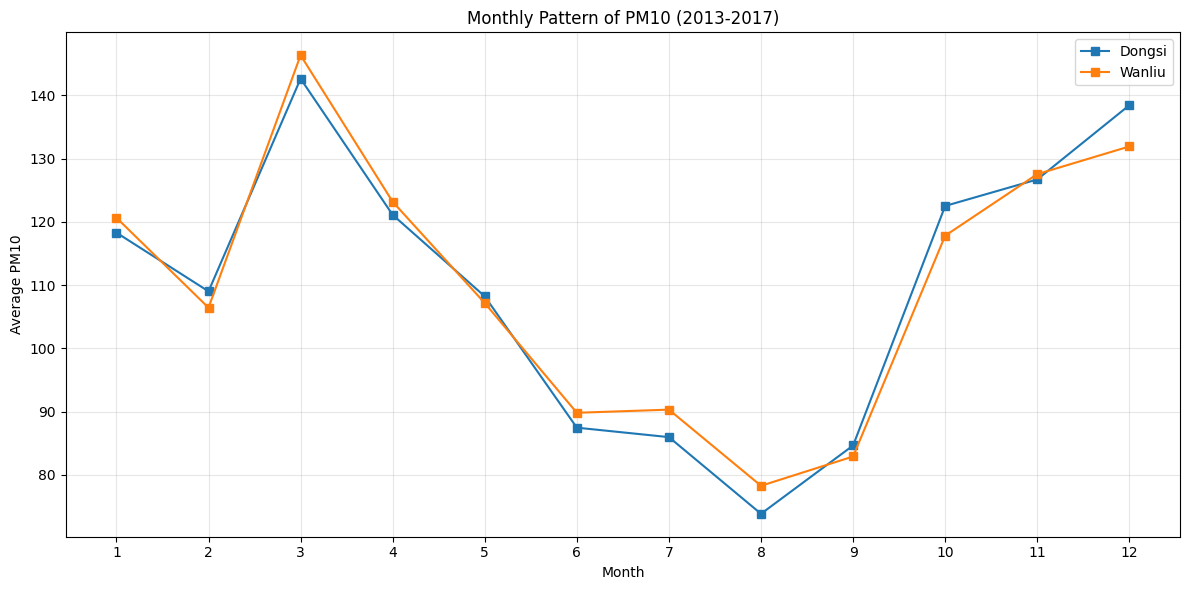

In [25]:
# Monthly Pattern of PM10
plt.figure(figsize=(12, 6))
monthly_avg = year_filter.groupby(['station', 'month'])['PM10'].mean().unstack()
for station in monthly_avg.index:
    plt.plot(monthly_avg.loc[station], marker='s', label=station)

plt.title('Monthly Pattern of PM10 (2013-2017)')
plt.xlabel('Month')
plt.ylabel('Average PM10')
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

**Insight:**
- Seasonal variation with highest concentrations in winter/spring (around 3rd month or March) and lowest in summer (around 8th month or August).
- March shows peak concentrations (>140) at both stations, likely due to a combination of warming emissions and meteorological factors.
- The summer months (around 6th to 9th month or June-September) consistently show lower PM10 levels (<90), likely due to increased rainfall.
- Both stations show similar seasonal patterns, confirming the regional nature of air pollution

### Question 2: What are the specific effects of temperature (TEMP), dew point (DEWP), and air pressure (PRES) on PM10 at Dongsi and Wanliu stations over the past 12 months?

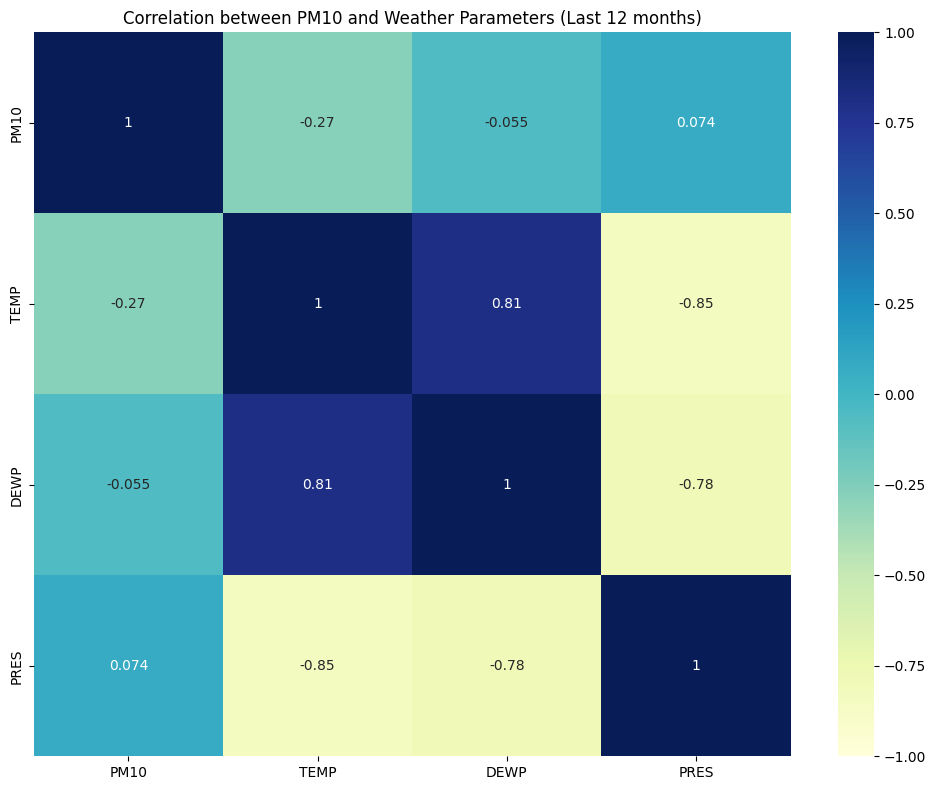

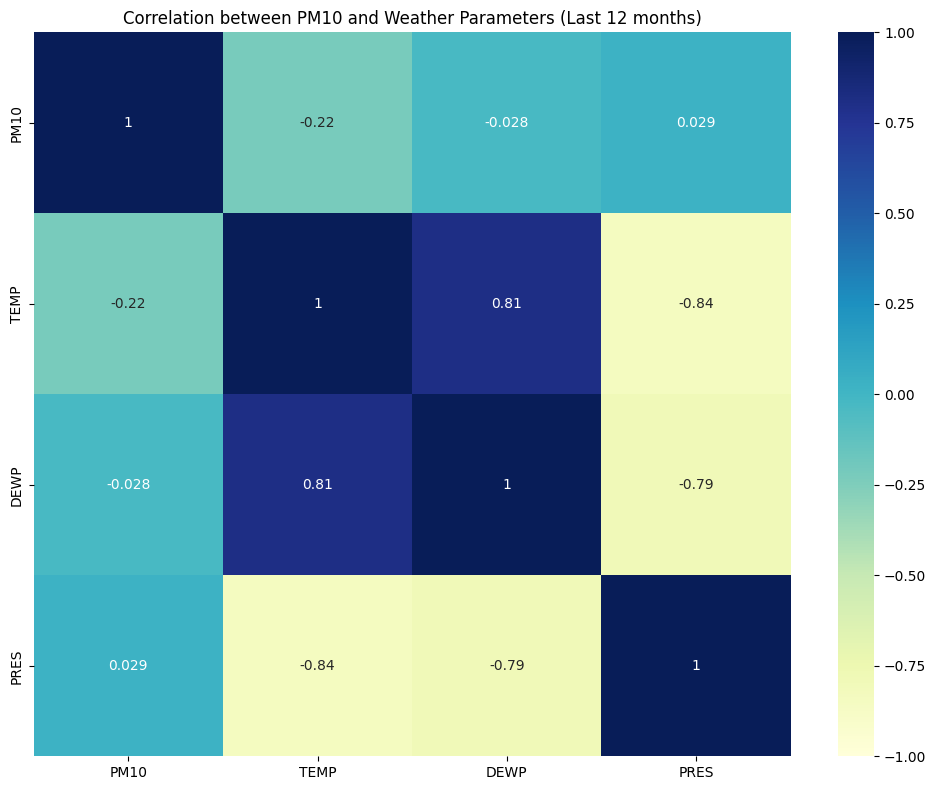

In [32]:
# Heatmap Correlation between PM10 and Weather Parameters for Dongsi
plt.figure(figsize=(10, 8))
sns.heatmap(dongsi_corr, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.title('Correlation between PM10 and Weather Parameters (Last 12 months)')
plt.tight_layout()
plt.show()

# Heatmap Correlation between PM10 and Weather Parameters for Wanliu
plt.figure(figsize=(10, 8))
sns.heatmap(wanliu_corr, annot=True, cmap='YlGnBu', vmin=-1, vmax=1)
plt.title('Correlation between PM10 and Weather Parameters (Last 12 months)')
plt.tight_layout()
plt.show()

**Insight:**
- Temperature (TEMP) and Dew Point (DEWP) showed a negative correlation at both stations. For TEMP it is about -0.27 at Dongsi and -0.22 at Wanliu. For DEWP it is about -0.055 at Dongsi and -0.028 at Wanliu
- Air Pressure (PRES) shows a weak positive correlation at both stations. About 0.074 at Dongsi and 0.029 at Wanliu.

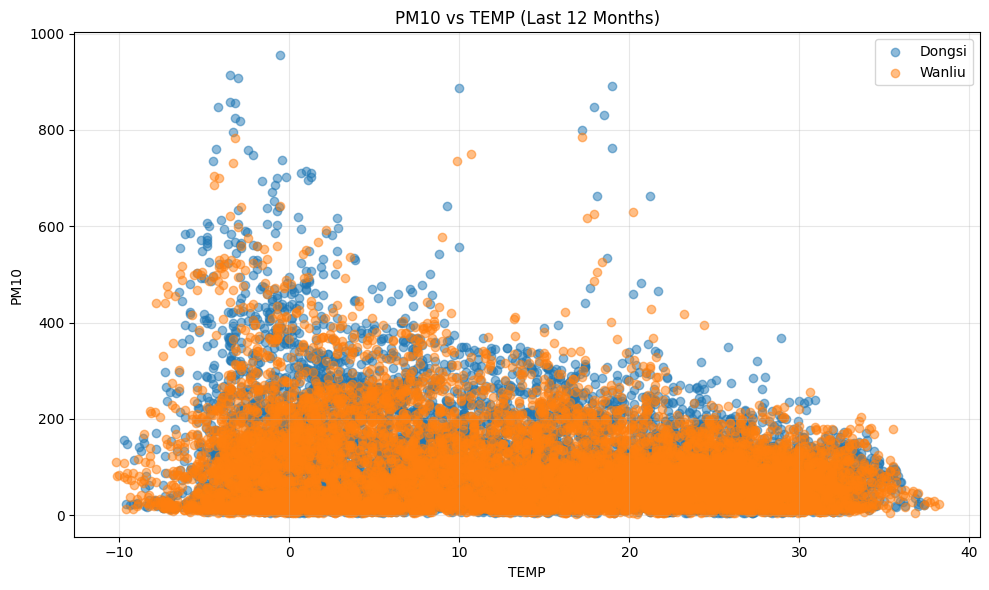

In [27]:
# Scatter plot PM10 vs TEMP
plt.figure(figsize=(10, 6))
for station in df_12m['station'].unique():
    station_data = df_12m[df_12m['station'] == station]
    plt.scatter(station_data['TEMP'], station_data['PM10'], alpha=0.5, label=station)
plt.title('PM10 vs TEMP (Last 12 Months)')
plt.xlabel('TEMP')
plt.ylabel('PM10')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

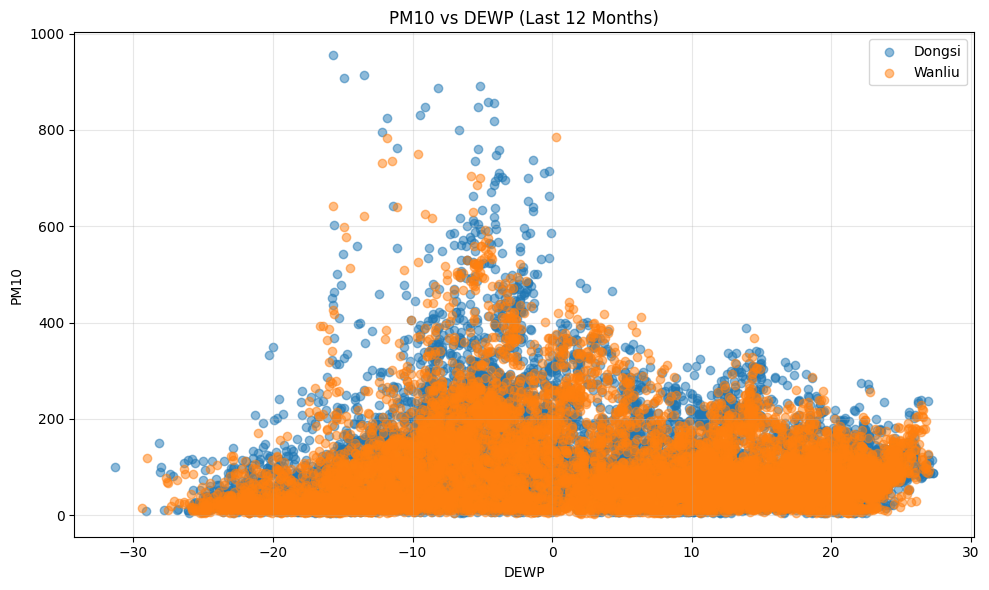

In [28]:
# Scatter plot PM10 vs DEWP
plt.figure(figsize=(10, 6))
for station in df_12m['station'].unique():
    station_data = df_12m[df_12m['station'] == station]
    plt.scatter(station_data['DEWP'], station_data['PM10'], alpha=0.5, label=station)
plt.title('PM10 vs DEWP (Last 12 Months)')
plt.xlabel('DEWP')
plt.ylabel('PM10')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

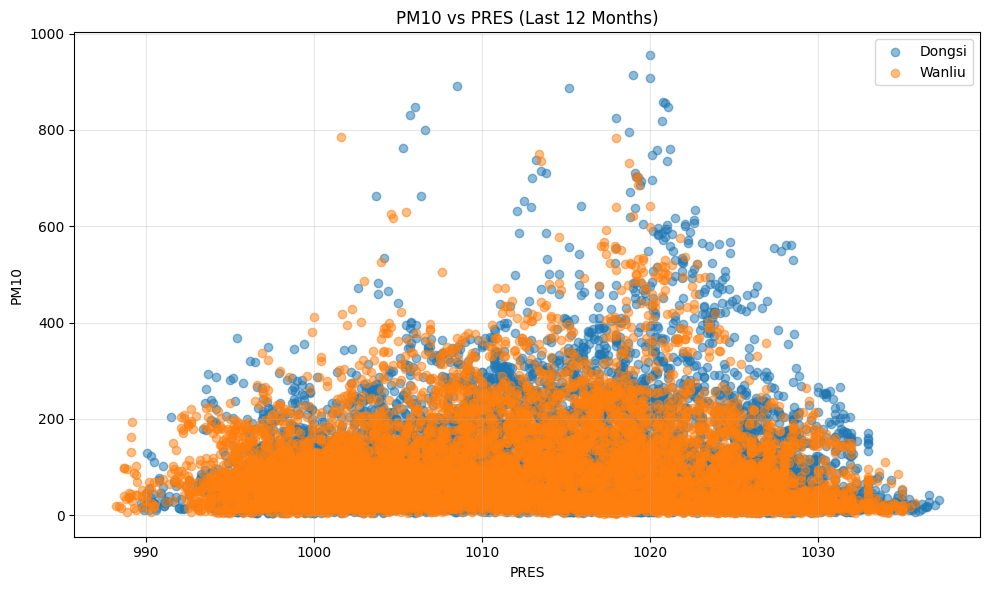

In [29]:
# Scatter plot PM10 vs PRES
plt.figure(figsize=(10, 6))
for station in df_12m['station'].unique():
    station_data = df_12m[df_12m['station'] == station]
    plt.scatter(station_data['PRES'], station_data['PM10'], alpha=0.5, label=station)
plt.title('PM10 vs PRES (Last 12 Months)')
plt.xlabel('PRES')
plt.ylabel('PM10')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

**Insight:**
- It is noted on the scatter plot of PM10 concentration and TEMP that PM10 concentration tends to increase when the temperature is below 0°C. In line with Temperature, Dew point (DEWP) also follows a similar pattern but with more scatter in its relationship.
- The air pressure (PRES) relationship is less clear, but there is a tendency for higher PM10 during high pressure systems
- The similar patterns at both stations suggest that meteorological factors affect the entire region in the same way

## Further Analysis

In [30]:
# Create temperature_category
df_12m['temp_category'] = pd.cut(df_12m['TEMP'],
                                bins=[-20, 0, 10, 20, 40],
                                labels=['Cold (<0°C)', 'Cool (0-10°C)', 'Mild (10-20°C)', 'Warm (>20°C)'])

# Groupby by station, temperature_category and hour
hourly_temp_pm10 = df_12m.groupby(['station', 'temp_category', 'hour'])['PM10'].mean().reset_index()

<ipython-input-30-35926bbc7133>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_12m['temp_category'] = pd.cut(df_12m['TEMP'],
<ipython-input-30-35926bbc7133>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_temp_pm10 = df_12m.groupby(['station', 'temp_category', 'hour'])['PM10'].mean().reset_index()


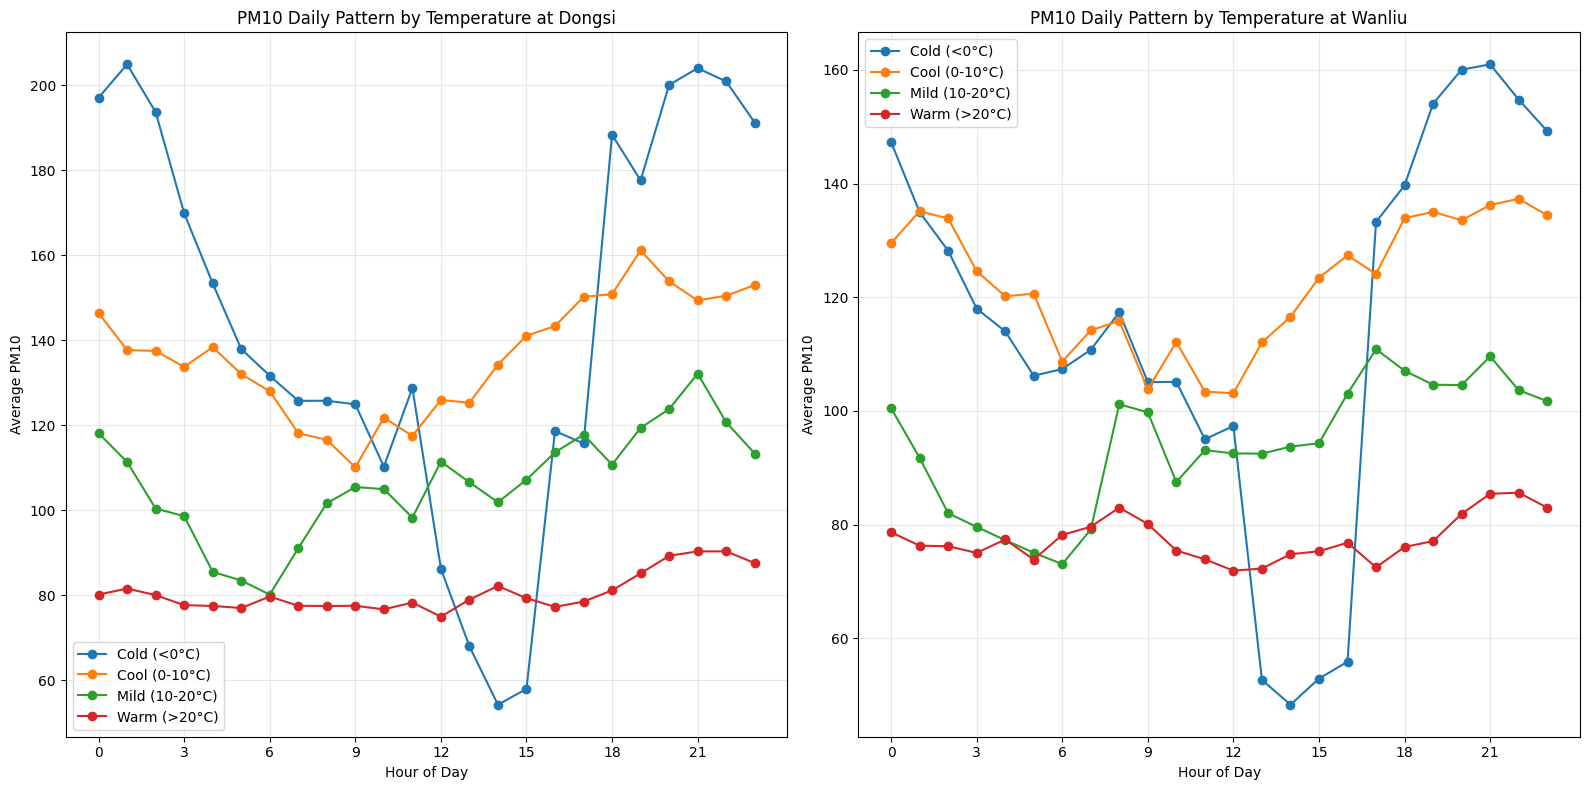

In [31]:
# Scatter Plot for each station
plt.figure(figsize=(16, 8))

for i, station in enumerate(['Dongsi', 'Wanliu']):
    plt.subplot(1, 2, i+1)
    station_data = hourly_temp_pm10[hourly_temp_pm10['station'] == station]

    # Plot each temperature category
    for temp_cat in station_data['temp_category'].unique():
        if pd.notnull(temp_cat):  # Handle any NaN categories
            temp_data = station_data[station_data['temp_category'] == temp_cat]
            plt.plot(temp_data['hour'], temp_data['PM10'], marker='o', label=temp_cat)

    plt.title(f'PM10 Daily Pattern by Temperature at {station}')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average PM10')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.xticks(range(0, 24, 3))

plt.tight_layout()
plt.show()

**Insight:**
- All temperature categories show similar patterns with peaks in the evening/night (around 6-10 PM) and troughs during the day (around 12-3 PM). This shows that apart from temperature, other factors such as daily human activities and atmospheric conditions affect PM10 concentrations.
- During the day, both stations with a temperature category of “Cold” showed a great decline around noon (around 12-3 PM), which formed a typical V-shaped pattern. This may indicate that even in cold weather, warmer daytime temperatures can temporarily improve air quality.
- The highest PM10 concentrations occur at night with a temperature category of “Cold” around 200 in Dongsi and 160 in Wanliu. This suggests that cold nighttime conditions create the worst air quality scenario.
- Both stations show similar patterns. However, Dongsi generally has higher PM10 concentrations under temperature conditions with the “Cold” category compared to Wanliu indicating possible site-specific factors affecting pollution dispersion.
- In the “Warm” temperature category, PM10 shows a stable graph throughout the day, with much less variation compared to the other temperature categories, suggesting that warmer conditions may result in more consistent air quality.

## Conclusion

### Conclution Question 1 [What is the daily pattern of PM10 concentrations at Dongsi and Wanliu stations for the period 2013-2017?]

**1. Daily Pattern of PM10 Concentration (2013-2017)**
******
**Findings:**
- Highest Point: Occurred at 21:00 (9 PM) with values of 130.3 in Dongsi and 129.7 in Wanliu.
- Lowest Point: Occurred at noon around 13:00-14:00 (1-2 PM) with values of 95.3 in Dongsi and 94.2 in Wanliu
- Daily pattern: There are two peaks in a day (bi-modal pattern) - morning around 8-9 AM and evening around 21-22 PM

**Reason:**
- The morning peak coincides with the morning peak of transportation and industrial activities
- The evening peak is due to a combination of afternoon/evening transportation activities and more stable atmospheric layer conditions at night (temperature inversion)
- The low PM10 concentration during the day is likely due to the increased height of the atmospheric mixing layer and thermal turbulence that aids pollutant dispersion


**2.  Seasonal Patterns of PM10 Concentrations (2013-2017)**
******
**Findings:**
- Month with Highest PM10: March with values of 142.6 in Dongsi and 146.3 in Wanliu
- Month with Lowest PM10: August with values of 73.8 in Dongsi and 78.2 in Wanliu
- Seasonal Variations: Winter/semi-season (December-March) shows 30-50% higher PM10 concentrations than summer (June-August)

**Reason:**
- High PM10 concentrations in March are related to meteorological conditions
- The low concentrations in summer (June-August) are attributed to heavy rainfall which helps to remove pollutants from the air (wet deposition)

###Conclusion Question 2 [What are the specific effects of temperature (TEMP), dew point(DEWP), and air pressure (PRES) on PM10 at Dongsi and Wanliu stations over the past 12 months?]

**Effects of Weather Parameters on PM10 (Last 12 Months)**
******
**Findings:**
1. Temperature (TEMP)
  - Negative Correlation: -0.27 in  Dongsi and -0.22 in Wanliu
  - Highest PM10: Occurs when temperatures are below 0°C, reaching >150 in extremely cold conditions
  - PM10 Lows: Occurs when temperatures are 10-20°C (mild), with values around 70
2. Dew Point (DEWP)
  - Weak Negative Correlation: -0.055 in Dongsi and -0.028 in Wanliu
  - Pattern: Similar to temperature but with a weaker correlation
3. Air Pressure (PRES)
  - Weak Positive Correlation: 0.074 in Dongsi and 0.029 in Wanliu
  - Highest PM10: Seen in high pressure systems with values of 143.9 in Dongsi and 127.8 in Wanliu
**Reason:**
- Low temperatures are often associated with thermal inversions that trap pollutants near the ground surface
- High pressure is usually associated with stable air and lack of atmospheric gas mixing, resulting in pollutants accumulating


**Patterns by Temperature Category (Advanced Analysis)**
******
**Findings:**
- Cold Conditions (<0°C): Show the highest PM10 concentrations throughout the day, especially at night
- Cool Conditions (0-10°C): Show similar daily patterns but with lower concentrations
- Warm Conditions (>10°C): Shows significantly lower PM10 concentrations

### Recomendation
Traffic:
****
- Encourage the use of public transportation to reduce the use of private vehicles

Seasonality:
****
- Improve monitoring and enforcement of industrial emissions during December-March when PM10 concentrations are highest
- Develop an early warning system for air quality based on meteorological forecasts, especially during low temperature conditions
- Implement operational restrictions on emission sources (private vehicles, heaters, etc.) during periods of cold air with high pressure

Energy Management:
****
- Introduce and support programs to switch from vehicles with carbon-based fuels to renewable energy

Public Health Policy:
****
- Raise public awareness about the risks of PM10 exposure, especially during low temperatures and high pressures
- Provide customized health recommendations for vulnerable groups (children, elderly, respiratory disease sufferers) based on identified daily and seasonal patterns